## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

## Load and Prepare Data

In [2]:
df = pd.read_csv('train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## EDA

In [3]:
print('Data Frame shape is:', df.shape)

Data Frame shape is: (10886, 12)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [5]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [6]:
# Check for missing values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [9]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [10]:
df.groupby('season').count()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
1,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686
2,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
3,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
4,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734


In [11]:
df.groupby('weather').count()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
weather,,,,,,,,,,,
1,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
2,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
3,859,859,859,859,859,859,859,859,859,859,859
4,1,1,1,1,1,1,1,1,1,1,1


In [12]:
df.groupby(['season','weather']).count()

datetime  holiday  workingday  temp  atemp  humidity  \
season weather                                                         
1      1            1759     1759        1759  1759   1759      1759   
       2             715      715         715   715    715       715   
       3             211      211         211   211    211       211   
       4               1        1           1     1      1         1   
2      1            1801     1801        1801  1801   1801      1801   
       2             708      708         708   708    708       708   
       3             224      224         224   224    224       224   
3      1            1930     1930        1930  1930   1930      1930   
       2             604      604         604   604    604       604   
       3             199      199         199   199    199       199   
4      1            1702     1702        1702  1702   1702      1702   
       2             807      807         807   807    807       807   
       3             225      225         225   225    225       225   

                windspeed  casual  registered  count  
season weather                                        
1      1             1759    1759        1759   1759  
       2              715     715         715    715  
       3              211     211         211    211  
       4                1       1           1      1  
2      1             1801    1801        1801   1801  
       2              708     708         708    708  
       3              224     224         224    224  
3      1             1930    1930        1930   1930  
       2              604     604         604    604  
       3              199     199         199    199  
4      1             1702    1702        1702   1702  
       2              807     807         807    807  
       3              225     225         225    225

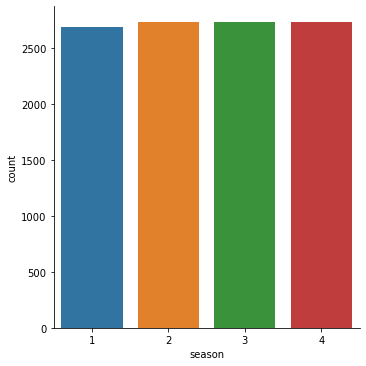

In [13]:
sns.catplot(x='season' ,kind="count",data=df)

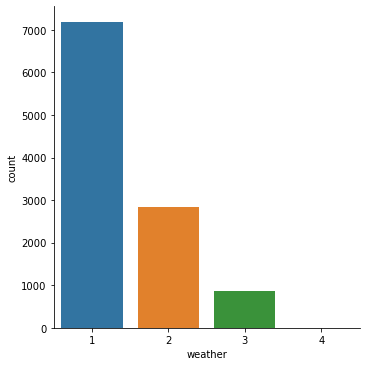

In [14]:
sns.catplot(x='weather' ,kind="count",data=df)

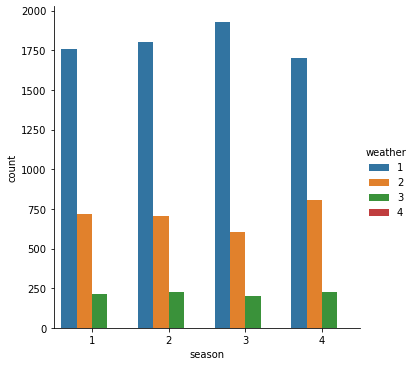

In [15]:
sns.catplot(x='season' ,hue="weather",kind="count", data=df)

# Data Preprocessing

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


<AxesSubplot:>

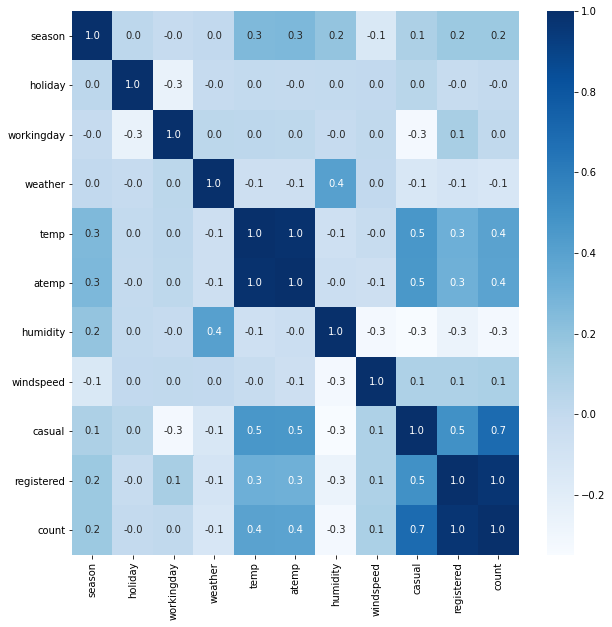

In [17]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt='0.1f')

In [18]:
X = df[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y = df['count']

In [19]:
X

,season,weather,temp,atemp,humidity,windspeed
0,1,1,9.84,14.395,81,0.0000
1,1,1,9.02,13.635,80,0.0000
2,1,1,9.02,13.635,80,0.0000
3,1,1,9.84,14.395,75,0.0000
4,1,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...
10881,4,1,15.58,19.695,50,26.0027
10882,4,1,14.76,17.425,57,15.0013
10883,4,1,13.94,15.910,61,15.0013
10884,4,1,13.94,17.425,61,6.0032


## Strorytelling - Visualization

In [20]:
sns.set_theme(context='notebook', palette='Paired', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.color_palette('Paired') #choose a palette

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [21]:
sns.set_context('notebook', font_scale=1.5 , rc={'lines.linwidth': 2.5})

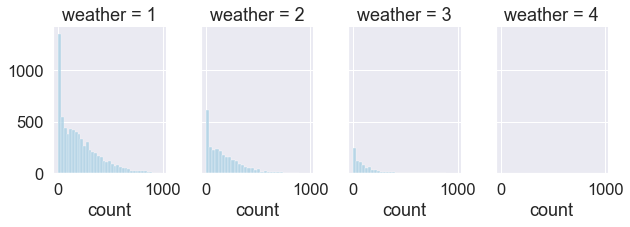

In [22]:
g = sns.FacetGrid(data=df, col='weather', height=3.5, aspect=0.65)
g.map(sns.histplot, 'count')

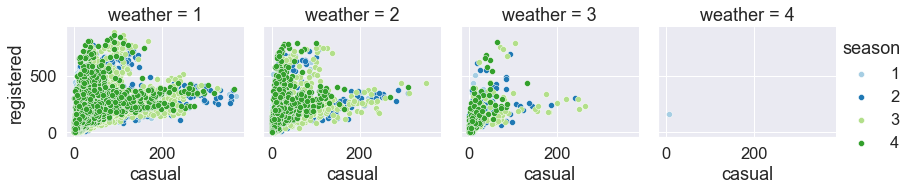

In [23]:
g = sns.FacetGrid(data = df, col='weather', hue = 'season')
g.map(sns.scatterplot,'casual', 'registered')
g.set_axis_labels('casual', 'registered')
g.add_legend()

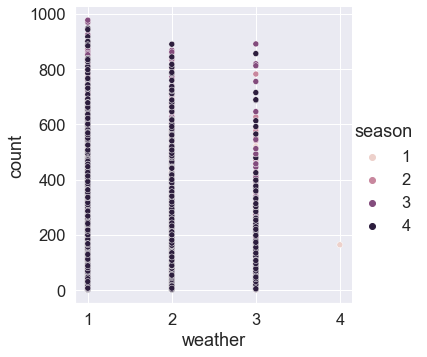

In [24]:
sns.relplot(x='weather', y='count', data=df, hue='season')

## Train your model (Regression)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# linear regression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [27]:
regressor.intercept_

132.49281005888946

In [28]:
regressor.coef_

array([22.87799281,  5.30034098,  1.57678664,  5.83883228, -2.99950254,
        0.70540056])

In [29]:
X_train.columns

Index(['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'], dtype='object')

In [30]:
regressor.coef_

array([22.87799281,  5.30034098,  1.57678664,  5.83883228, -2.99950254,
        0.70540056])

In [31]:
predictions = regressor.predict(X_test)

In [32]:
print("R^2 Error: ", metrics.r2_score(y_test, predictions))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R^2 Error:  0.2736371194197922
Mean Absolute Error:  116.20784177772231
Mean Squared Error:  24402.178629295795
Root Mean Squared Error:  156.2119669849138


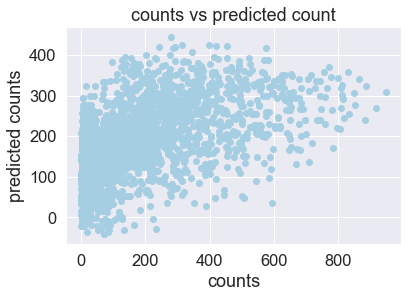

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel("counts")
plt.ylabel("predicted counts")
plt.title('counts vs predicted count')
plt.show()

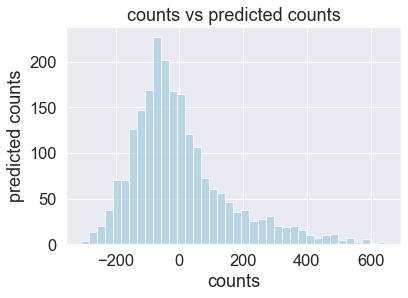

In [34]:
sns.histplot(y_test - predictions)
plt.xlabel("counts")
plt.ylabel("predicted counts")
plt.title('counts vs predicted counts')
plt.show()

# polynomial regression with degree = 2

In [35]:
from sklearn.preprocessing import PolynomialFeatures
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(X_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [36]:
print("R^2 Error: ", metrics.r2_score(y_test, y_test_predicted))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_test_predicted))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_test_predicted))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

R^2 Error:  0.2994416262881122
Mean Absolute Error:  113.29192349511248
Mean Squared Error:  23535.27559380663
Root Mean Squared Error:  153.41211032316394


# polynomial regression with degree = 3

In [37]:
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(X_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [38]:
print("R^2 Error: ", metrics.r2_score(y_test, y_test_predicted))
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_test_predicted))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_test_predicted))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted)))

R^2 Error:  0.3167397704447855
Mean Absolute Error:  111.91949404774313
Mean Squared Error:  22954.144020385265
Root Mean Squared Error:  151.50625076340998


## Test Result

In [39]:
df_test = pd.read_csv('test.csv')
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [40]:
x = df_test[['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]

In [41]:
x

,season,weather,temp,atemp,humidity,windspeed
0,1,1,10.66,11.365,56,26.0027
1,1,1,10.66,13.635,56,0.0000
2,1,1,10.66,13.635,56,0.0000
3,1,1,10.66,12.880,56,11.0014
4,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...
6488,1,2,10.66,12.880,60,11.0014
6489,1,2,10.66,12.880,60,11.0014
6490,1,1,10.66,12.880,60,11.0014
6491,1,1,10.66,13.635,56,8.9981


In [42]:
predictions_test = regressor.predict(x)

In [43]:
predictions_test

array([94.20819515, 89.12002518, 89.12002518, ..., 80.4740904 ,
       95.46729   , 68.4717671 ])